In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import linregress
import numpy as np


In [2]:
# Import our data into pandas from CSV
hh_income = 'trevordata/hh_income.csv'
hh_income_df = pd.read_csv(hh_income, low_memory=False)
hh_income_df.head()

,State,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991
0,United States,61372,60309,58476,55613,55612,54569,54673,55520,57010,...,59938,60062,58612,56533,55394,54600,52942,52334,52615,53025
1,Alabama,51113,48237,46053,43820,46746,46490,46520,46120,45789,...,50566,53502,54664,48794,47294,41646,44626,42017,44323,42852
2,Alaska,72231,77351,77717,70095,70413,68080,62731,65178,70555,...,75436,75854,76408,73321,82374,76837,74443,71917,71791,71482
3,Arizona,61125,58328,54060,51050,54394,50320,53108,52839,52385,...,56788,54600,55906,50018,49377,49452,51349,51110,50420,54101
4,Arkansas,48829,46894,44282,46560,41789,41735,45114,43477,41847,...,42391,43807,41700,39968,42332,41362,41950,38594,41015,41248


In [3]:
median_hh_income = hh_income_df.set_index("State").stack().reset_index()
median_hh_income.columns = ['Location', 'Year', 'Income']
median_hh_income['Year']= median_hh_income['Year'].astype(int)
#median_hh_income['Income']= median_hh_income['Income'].astype(float)
median_hh_income.head()

,Location,Year,Income
0,United States,2017,61372
1,United States,2016,60309
2,United States,2015,58476
3,United States,2014,55613
4,United States,2013,55612


In [4]:
# Import our data into pandas from CSV
hate_crime = 'trevordata/hate_crime_copy.csv'
hate_crime_df = pd.read_csv(hate_crime, low_memory=False)
hate_crime_df = hate_crime_df[["DATA_YEAR", "STATE_NAME", "STATE_ABBR", "VICTIM_COUNT"]]
hate_crime_df.head()

,DATA_YEAR,STATE_NAME,STATE_ABBR,VICTIM_COUNT
0,1991,Arkansas,AR,1
1,1991,Arkansas,AR,1
2,1991,Arkansas,AR,1
3,1991,Arkansas,AR,2
4,1991,Arkansas,AR,1


In [5]:
hate_crime_counts = hate_crime_df.groupby(["STATE_NAME", "DATA_YEAR"]).count()["VICTIM_COUNT"]
hate_crime_state = hate_crime_counts.reset_index()
hate_crime_state.head()

,STATE_NAME,DATA_YEAR,VICTIM_COUNT
0,Alabama,1992,4
1,Alabama,1993,5
2,Alabama,2002,2
3,Alabama,2003,1
4,Alabama,2004,3


In [6]:
#hate_crime_US = hate_crime_counts.groupby("DATA_YEAR")["VICTIM_COUNT"].sum().reset_index()
#hate_crime_US['STATE_NAME'] = 'United States'
#hate_crime_US.head()

In [7]:
hate_crime_full = hate_crime_state.append(hate_crime_state, ignore_index=True, sort=False)
hate_crime_full.columns = ['Location', 'Year', 'Victims']
hate_crime_full.head()

,Location,Year,Victims
0,Alabama,1992,4
1,Alabama,1993,5
2,Alabama,2002,2
3,Alabama,2003,1
4,Alabama,2004,3


In [8]:
median_hh_income.head()
median_hh_income["Income"].astype(int)
median_hh_income.dtypes

Location    object
Year         int32
Income       int64
dtype: object

In [9]:
final_df = pd.merge(hate_crime_full, median_hh_income, how='left', on=['Location', 'Year'])
final_df.head()

,Location,Year,Victims,Income
0,Alabama,1992,4,44323.0
1,Alabama,1993,5,42017.0
2,Alabama,2002,2,51380.0
3,Alabama,2003,1,49774.0
4,Alabama,2004,3,47651.0


In [10]:
#hate_crime_counts = hate_crime_df.groupby(["DATA_YEAR"]).sum()["VICTIM_COUNT"]
#hate_crime_counts

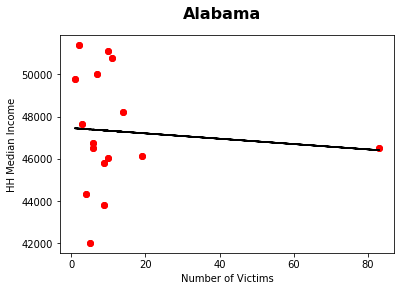

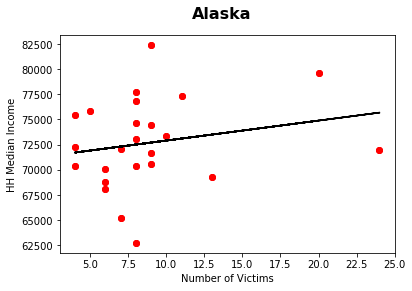

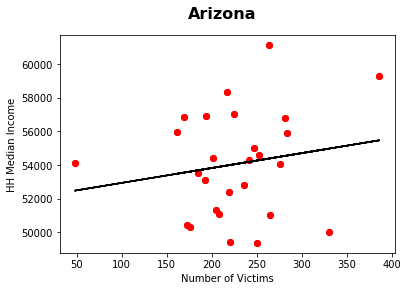

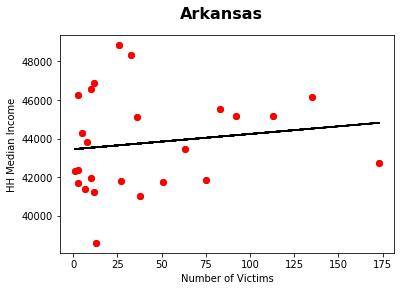

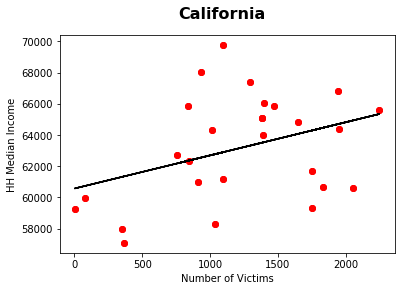

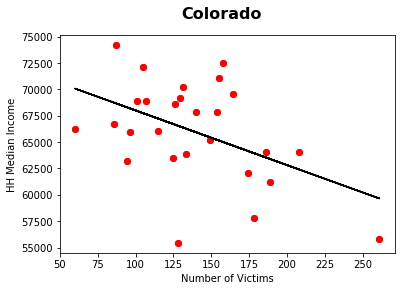

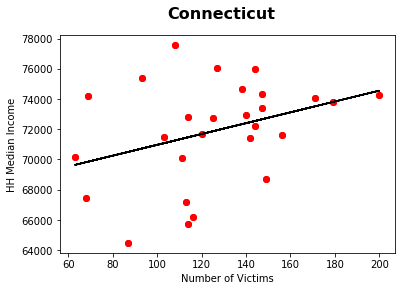

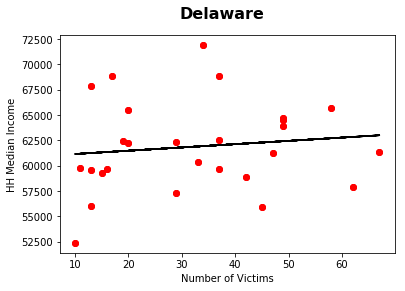

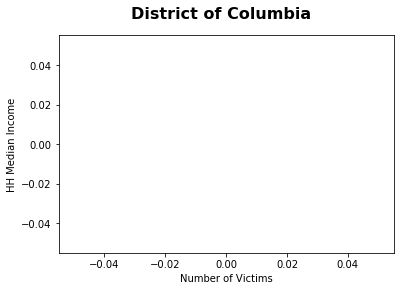

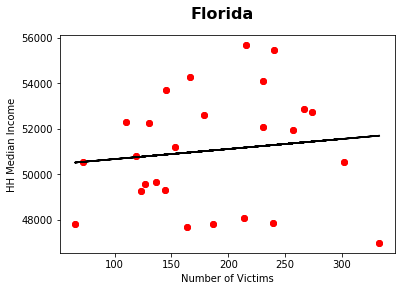

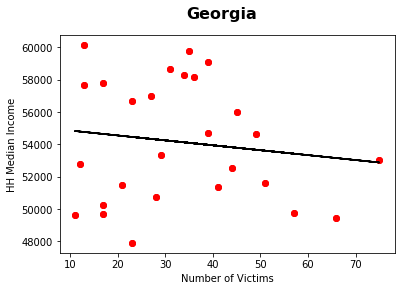

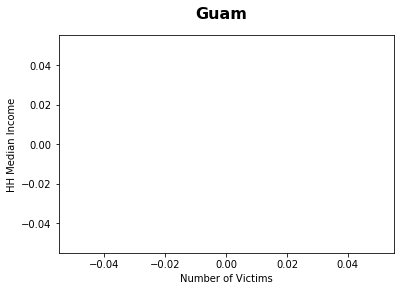

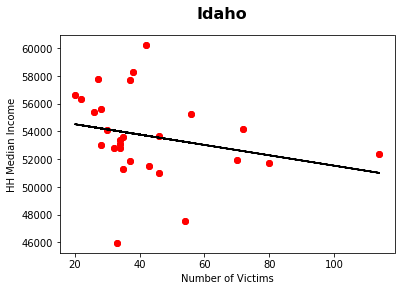

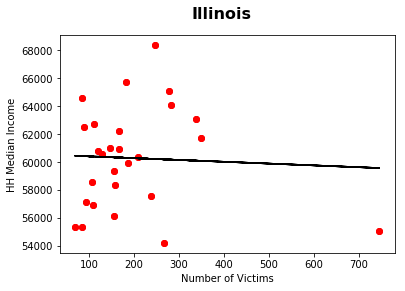

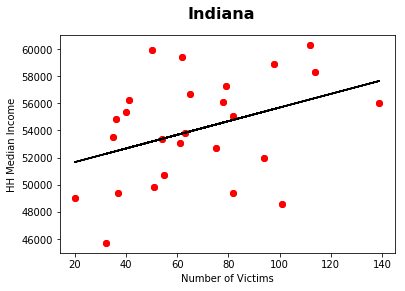

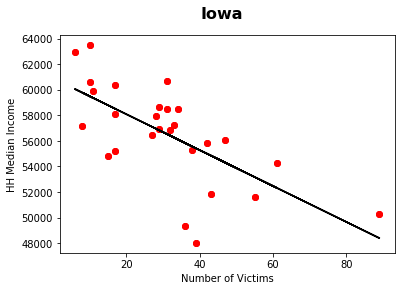

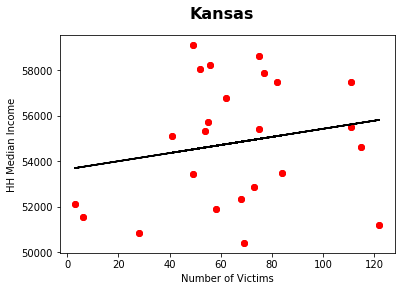

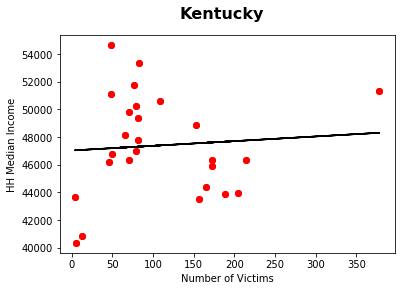

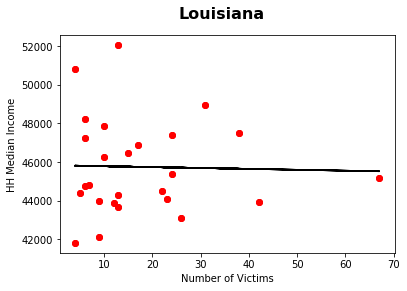

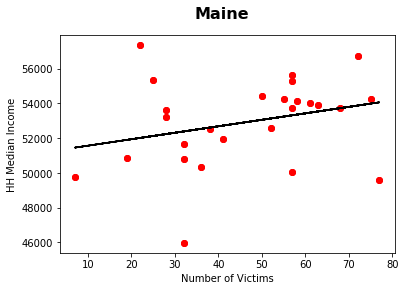

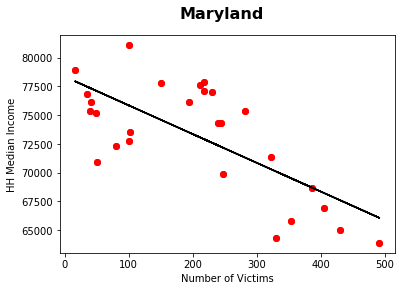

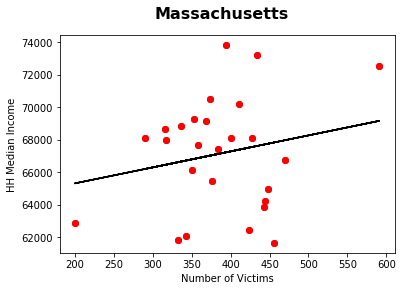

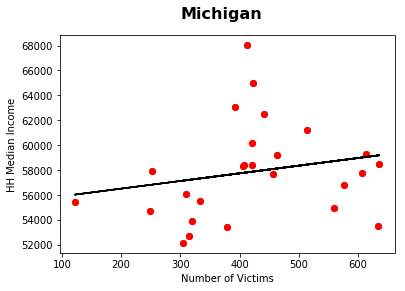

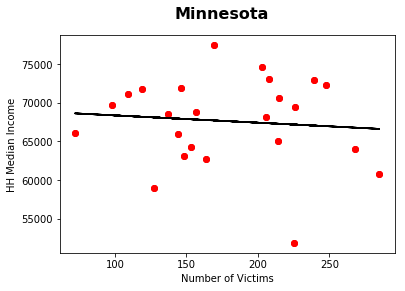

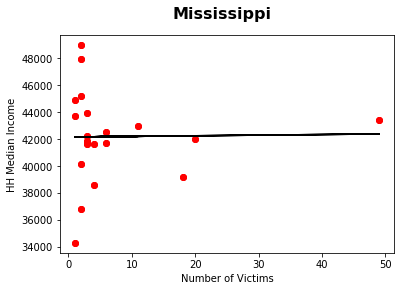

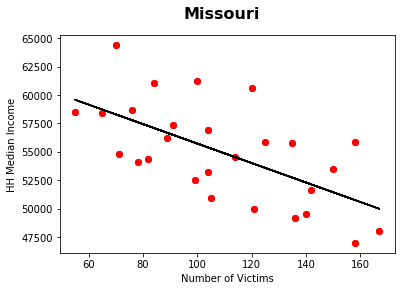

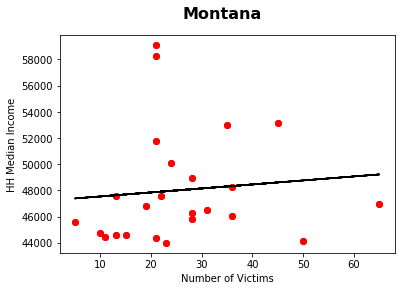

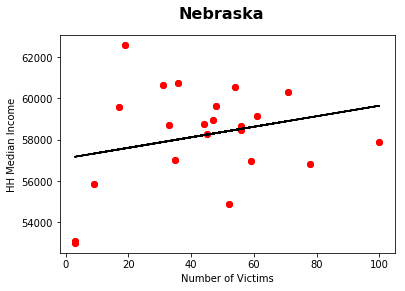

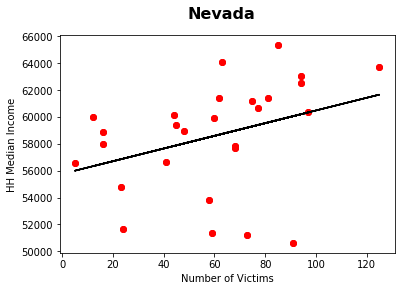

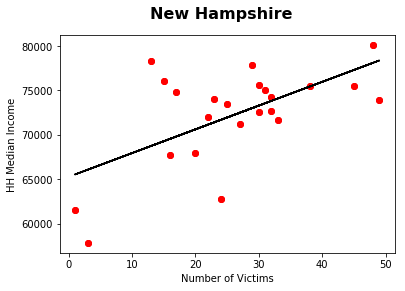

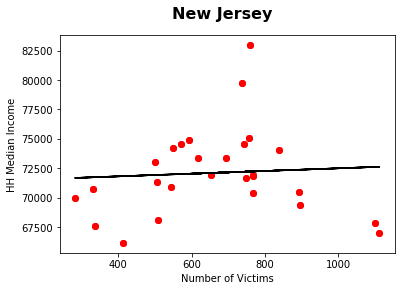

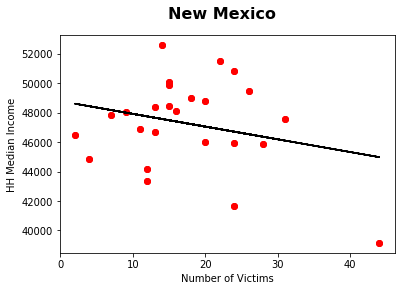

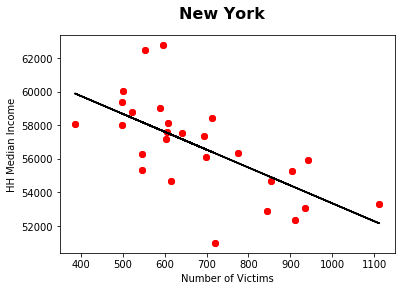

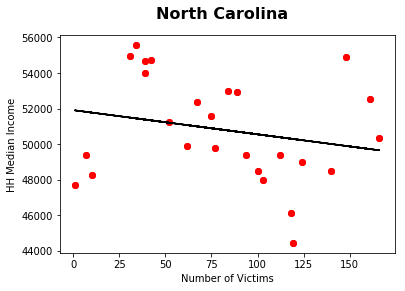

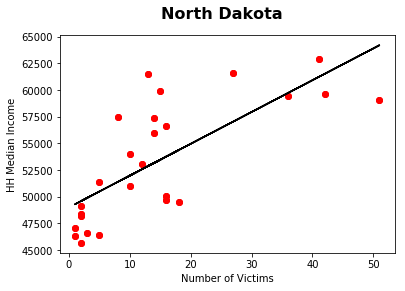

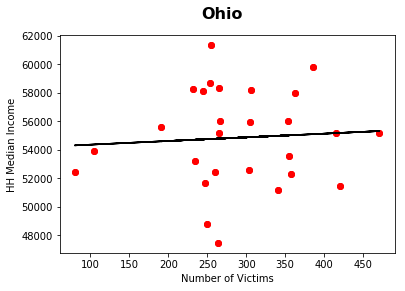

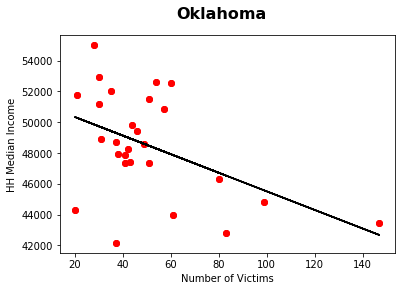

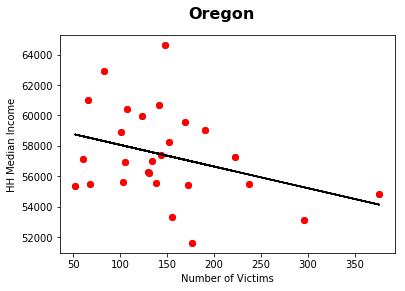

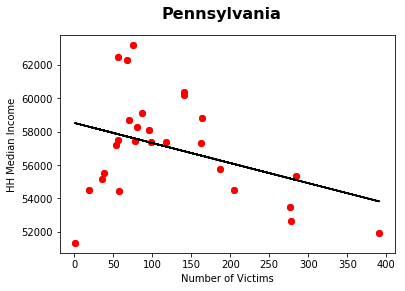

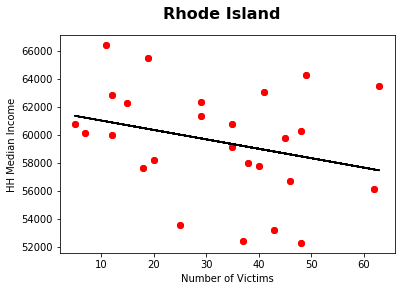

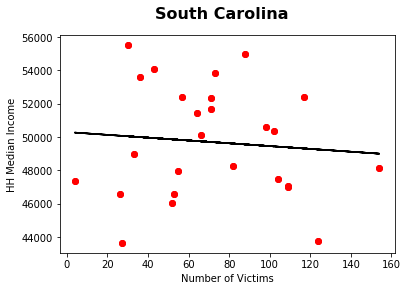

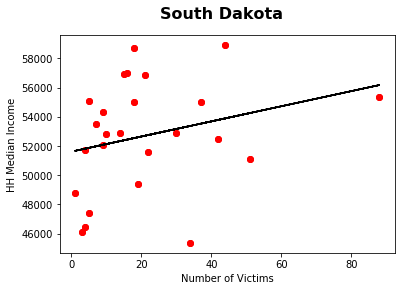

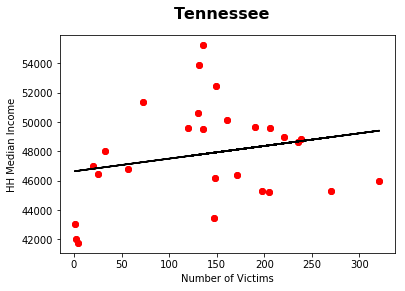

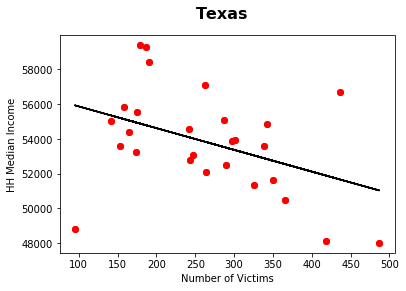

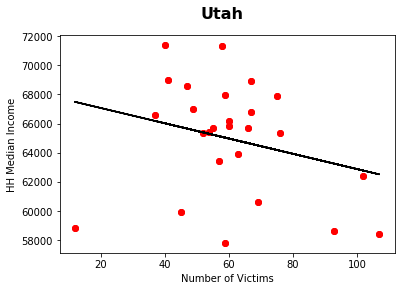

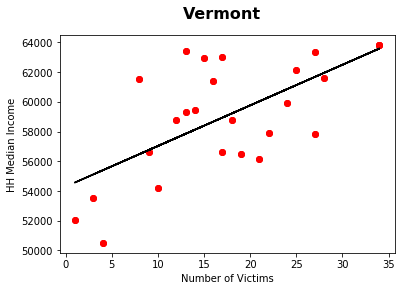

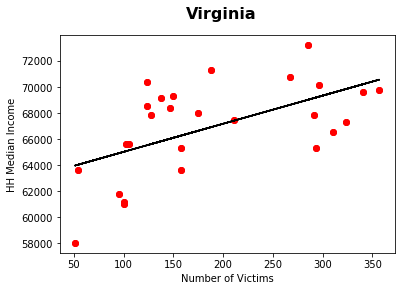

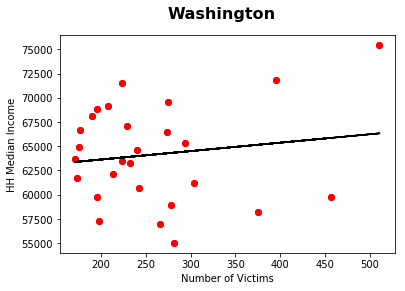

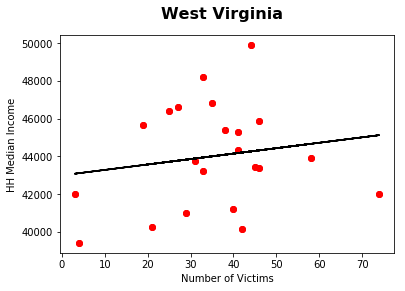

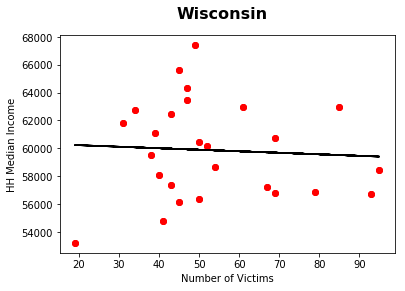

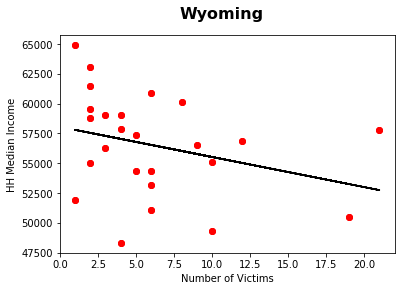

In [29]:
location = final_df["Location"].unique()
name = []
r_sqr = [] 
p_val = []

for location in location:
    temp_df = final_df.loc[final_df["Location"] == location]
    vics = temp_df.loc[:, "Victims"]
    inc = temp_df.loc[:, "Income"]
    
    fig, ax = plt.subplots()
    
    fig.suptitle(location, fontsize=16, fontweight="bold")
    ax.set_ylabel("HH Median Income")
    ax.set_xlabel("Number of Victims")
    
    # Set line
    (slope, intercept, _, _, _) = linregress(vics, inc)
    fit = slope * vics + intercept
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(vics, inc)
    
    r_squared = r_value**2
    
    name.append(location)
    r_sqr.append(r_squared) 
    p_val.append(p_value)
    
    # Plot Results
    ax.plot(vics, inc, linewidth=0, color='red', marker='o')
    ax.plot(vics, fit, 'black')
    
    plt.savefig(f"trevoroutput/{location}.png")

In [20]:
values_df = pd.DataFrame({"States": name,
                         "R-Sqr Values": r_sqr,
                         "P Values": p_val})

values_df.dropna(inplace=True)


values_df.dtypes


States           object
R-Sqr Values    float64
P Values        float64
dtype: object

In [21]:
values_df = values_df.sort_values("R-Sqr Values", ascending=False)
values_df = values_df.head(10)
values_df

,States,R-Sqr Values,P Values
34,North Dakota,0.542544,4.841833e-10
20,Maryland,0.505495,1.701678e-09
15,Iowa,0.448040,3.136044e-08
32,New York,0.424592,9.482648e-08
45,Vermont,0.416855,4.133125e-07
25,Missouri,0.391224,4.263670e-07
29,New Hampshire,0.370107,7.287863e-06
46,Virginia,0.320766,8.046260e-06
5,Colorado,0.223169,3.100501e-04
36,Oklahoma,0.222691,3.153362e-04


In [22]:
States = values_df["States"]
Rsqrd_values = values_df["R-Sqr Values"]
p_values = values_df["P Values"]

locals = States.count()
locals

10

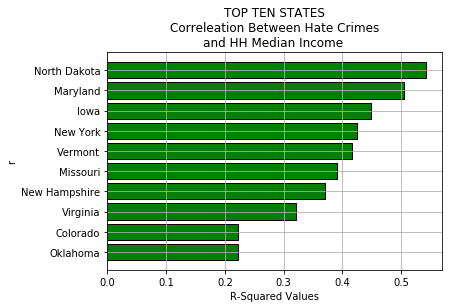

In [31]:

fig, ax = plt.subplots()

geos = States 
y_pos = np.arange(locals) 
r = Rsqrd_values

ax.barh(geos, r, align='center', color='green', edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(geos)
ax.set_xlabel('R-Squared Values')
ax.set_title("TOP TEN STATES\nCorreleation Between Hate Crimes\nand HH Median Income ")
plt.gca().invert_yaxis()
plt.ylabel("r")
plt.grid()
plt.savefig(f"trevoroutput/topten.png")

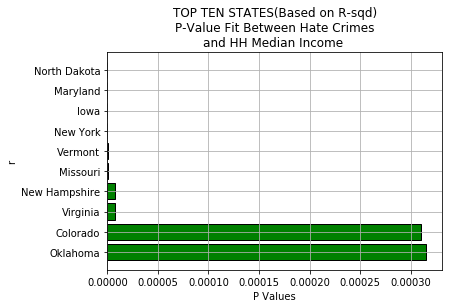

In [24]:
fig, ax = plt.subplots()

geos = States #states.loc[:,"States"]
y_pos = np.arange(locals) #np.arange(len(geos))
p = p_values #states.loc[:,"R-Sqr Values"]

ax.barh(geos, p , align='center', color='green', edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(geos)
ax.set_xlabel('P Values')
ax.set_title("TOP TEN STATES(Based on R-sqd)\nP-Value Fit Between Hate Crimes\nand HH Median Income ")
plt.gca().invert_yaxis()
plt.ylabel("r")
plt.grid()

In [25]:
us_sum = 'trevordata/usa_table.csv'
us_sum_df = pd.read_csv(us_sum, low_memory=False)

us_sum_df.head()

,year,us_income,us_hc
0,2017,61372,7689
1,2016,60309,6556
2,2015,58476,6092
3,2014,55613,5834
4,2013,55612,6268


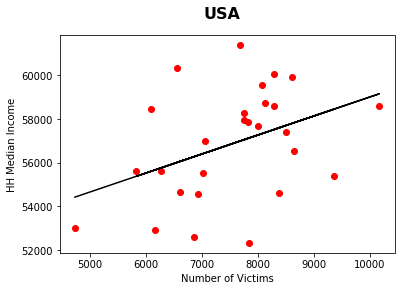

In [32]:
vics = us_sum_df.loc[:, "us_hc"]
inc = us_sum_df.loc[:, "us_income"]
    
fig, ax = plt.subplots()
    
fig.suptitle("USA", fontsize=16, fontweight="bold")
ax.set_ylabel("HH Median Income")
ax.set_xlabel("Number of Victims")
    
# Set line
(slope, intercept, _, _, _) = linregress(vics, inc)
fit = slope * vics + intercept
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(vics, inc)
    
r_squared = r_value**2
    

# Plot Results
ax.plot(vics, inc, linewidth=0, color='red', marker='o')
ax.plot(vics, fit, 'black')

r_squared

plt.savefig(f"trevoroutput/usa.png")